In [1]:
import json
import numpy as np
import matplotlib as mpl
import matplotlib.dates as mdates
import matplotlib.pyplot as plt
import matplotlib.ticker as ticker
import pandas as pd
import requests

%run C:\Users\Joshua\Jupyter_Notebook_Folders\APIkeys.py

### Get the list of surveys from the Bureau of Labor Statistics

In [2]:
surveys_url = "https://api.bls.gov/publicAPI/v2/surveys"
s = requests.get(surveys_url)
s_json = s.json()                          # Turn request into JSON 
surveys = s_json["Results"]["survey"]      # Get list of surveys from the JSON
surveys

[{'survey_abbreviation': 'AP',
  'survey_name': 'Consumer Price Index - Average Price Data'},
 {'survey_abbreviation': 'BD', 'survey_name': 'Business Employment Dynamics'},
 {'survey_abbreviation': 'BG',
  'survey_name': 'Collective Bargaining Agreements-State and Local Government'},
 {'survey_abbreviation': 'BP',
  'survey_name': 'Collective Bargaining Agreements-Private Sector'},
 {'survey_abbreviation': 'CC',
  'survey_name': 'Employer Costs for Employee Compensation'},
 {'survey_abbreviation': 'CD',
  'survey_name': 'Nonfatal cases involving days away from work: selected characteristics'},
 {'survey_abbreviation': 'CE',
  'survey_name': 'Employment, Hours, and Earnings from the Current Employment Statistics survey (National)'},
 {'survey_abbreviation': 'CF',
  'survey_name': 'Census of Fatal Occupational Injuries'},
 {'survey_abbreviation': 'CH',
  'survey_name': 'Nonfatal cases involving days away from work: selected characteristics (2003 - 2010)'},
 {'survey_abbreviation': 'CI', 

### Create the series id

CU   : Consumer Price Index - All Urban Consumers <br>
U    : Not seasonally adjusted <br>
R    : Monthly periodicity <br>
0000 : U.S. city average <br>
SA0  : All items <br>

series = 'CUUR0000SA0'

In [3]:
base_url = 'https://api.bls.gov/publicAPI/v2/timeseries/data/'  #this will not change
headers = {'Content-type': 'application/json'}  #This will not changed !

# For the key seriesid enter a list of series names you wish to download
# For the key startyear enter the start year inside ""
# For the key endyear enter the end year inside ""

parameters = {
    "seriesid":["CUUR0000SA0"], 
    "startyear":"2011", 
    "endyear":"2022",
    "catalog":True, 
    "calculations":False, 
    "annualaverage":False,
    "aspects":False,
    "registrationkey":os.environ['BLS_API_key'] 
 }

data = json.dumps(parameters) # Converts the Python dictionary to JSON

'''
Note: we don't need to do json.dumps for the variable headers because this dictionary 
      is simple and already satisfies the JSON format
'''

"\nNote: we don't need to do json.dumps for the variable headers because this dictionary \n      is simple and already satisfies the JSON format\n"

In [4]:
p = requests.post(base_url, data=data, headers=headers)
cpi_data = json.loads(p.text)

[{'year': '2022',
  'period': 'M04',
  'periodName': 'April',
  'latest': 'true',
  'value': '289.109',
  'footnotes': [{}]},
 {'year': '2022',
  'period': 'M03',
  'periodName': 'March',
  'value': '287.504',
  'footnotes': [{}]},
 {'year': '2022',
  'period': 'M02',
  'periodName': 'February',
  'value': '283.716',
  'footnotes': [{}]},
 {'year': '2022',
  'period': 'M01',
  'periodName': 'January',
  'value': '281.148',
  'footnotes': [{}]},
 {'year': '2021',
  'period': 'M12',
  'periodName': 'December',
  'value': '278.802',
  'footnotes': [{}]},
 {'year': '2021',
  'period': 'M11',
  'periodName': 'November',
  'value': '277.948',
  'footnotes': [{}]},
 {'year': '2021',
  'period': 'M10',
  'periodName': 'October',
  'value': '276.589',
  'footnotes': [{}]},
 {'year': '2021',
  'period': 'M09',
  'periodName': 'September',
  'value': '274.310',
  'footnotes': [{}]},
 {'year': '2021',
  'period': 'M08',
  'periodName': 'August',
  'value': '273.567',
  'footnotes': [{}]},
 {'year'

In [6]:
df = pd.DataFrame(cpi_data['Results']['series'][0]['data'])
df['month'] = df['year'] + df['period']
df['month'] = df['month'].str.replace('M', '-')
df = df.sort_values(by=['month'])
df = df.drop(columns=['year','period','footnotes','periodName'])
df['value'] = df['value'].astype(float)

int64


latest    value    month
135    NaN  220.223  2011-01
134    NaN  221.309  2011-02
133    NaN  223.467  2011-03
132    NaN  224.906  2011-04
131    NaN  225.964  2011-05
..     ...      ...      ...
4      NaN  278.802  2021-12
3      NaN  281.148  2022-01
2      NaN  283.716  2022-02
1      NaN  287.504  2022-03
0     true  289.109  2022-04

[136 rows x 3 columns]

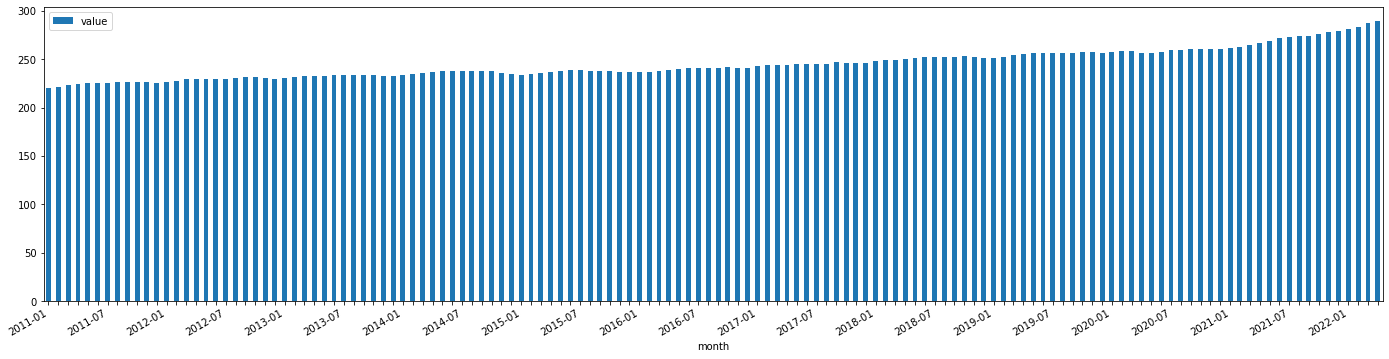

In [22]:

ax = df.plot(kind='bar', x='month', stacked=True, figsize=(24, 6))

ticklabels = ['']*len(df.index)
ticklabels[::6] = df['month'][::6]

ax.xaxis.set_major_formatter(ticker.FixedFormatter(ticklabels))

plt.gcf().autofmt_xdate()
plt.show()